In [1]:
import os
os.environ['KAGGLE_USERNAME']="simransohal"
os.environ['KAGGLE_KEY']="3aa7697cd9a4ba2a3715c4a29c0f0cb6"

In [2]:
!kaggle datasets download -d muhammadkhalid/sign-language-for-numbers

 96% 46.0M/48.1M [00:03<00:00, 20.8MB/s]
100% 48.1M/48.1M [00:03<00:00, 16.4MB/s]


In [3]:
import zipfile
with zipfile.ZipFile('sign-language-for-numbers.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.optim import Adam

import torchvision.datasets as datasets
import torch.utils.data as td
import numpy as np
import matplotlib.pyplot as plt

import torch.nn.functional as F
from matplotlib import image
from matplotlib import pyplot
import time

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [6]:
import torch
import torchvision

models = torch.hub.load('pytorch/vision:v0.10.0', 'shufflenet_v2_x1_0', pretrained=False)
#models = [torchvision.models.resnet18(pretrained=False)]
models.fc == nn.Linear(models.fc.in_features,11)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


False

In [7]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4772, 0.4772, 0.4772], std=[-0.3425, -0.3425, -0.3425]),
])

In [8]:
dataset = datasets.ImageFolder(r"Sign Language for Numbers", transform=preprocess)
train_size = int(0.7 * len(dataset))
val_size=int(0.1*len(dataset))
test_size = len(dataset) - (train_size+val_size)
train_dataset,validation_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size,val_size,test_size])

In [9]:
from torch.utils.data import DataLoader

batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_dataloader=DataLoader(validation_dataset,batch_size=batch_size,shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [10]:
optimizers =Adam(models.parameters(), lr=0.001) 
criterion = nn.CrossEntropyLoss()

In [11]:
learning_rate = 0.001
num_epochs = 10
batch_size = 64

In [12]:
import time
training_loss = []
validation_loss = []
training_accuracy = []
validation_accuracy = []
models.to(device)
start_time=time.time()
for epoch in range(num_epochs):
    running_training_loss = 0.0
    running_training_accuracy = 0.0
    
    models.train()
    for i, (inputs, labels) in enumerate(train_dataloader):
        optimizers.zero_grad()
        inputs = inputs.to(device)  
        labels = labels.to(device) 
        outputs = models(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizers.step()
        running_training_loss += loss.item()
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1  }/{len(train_dataloader)}], Loss: {loss.item()}')
        _, preds = torch.max(outputs, 1)
        running_training_accuracy += torch.sum(preds == labels.data)
    
    epoch_training_loss = running_training_loss / len(train_dataloader)
    epoch_training_accuracy = running_training_accuracy / len(train_dataloader.dataset)
    training_loss.append(epoch_training_loss)
    training_accuracy.append(epoch_training_accuracy)
    
    running_validation_loss = 0.0
    running_validation_accuracy = 0.0
    models.eval()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(validation_dataloader):
            inputs = inputs.to(device)  
            labels = labels.to(device)
            outputs = models(inputs)
            loss = criterion(outputs, labels)
            running_validation_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            running_validation_accuracy += torch.sum(preds == labels.data)
    
    epoch_validation_loss = running_validation_loss / len(train_dataloader)
    epoch_validation_accuracy = running_validation_accuracy / len(validation_dataloader.dataset)
    validation_loss.append(epoch_validation_loss)
    validation_accuracy.append(epoch_validation_accuracy)
    print('Epoch [{}/{}], Training Loss: {}, Training Accuracy: {}, Validation Loss: {}, Validation Accuracy: {}'
          .format(epoch+1, num_epochs, epoch_training_loss, epoch_training_accuracy, epoch_validation_loss, epoch_validation_accuracy))
print("#########Time Taken{}#########".format(time.time()-start_time))

Epoch [1/10], Step [100/181], Loss: 1.4142602682113647
Epoch [1/10], Training Loss: 1.6486750969570645, Training Accuracy: 0.4583549499511719, Validation Loss: 0.10729833712893955, Validation Accuracy: 0.7551515102386475
Epoch [2/10], Step [100/181], Loss: 0.39223918318748474
Epoch [2/10], Training Loss: 0.5392234004334192, Training Accuracy: 0.8208657503128052, Validation Loss: 0.046762043846904904, Validation Accuracy: 0.8957575559616089
Epoch [3/10], Step [100/181], Loss: 0.3706953823566437
Epoch [3/10], Training Loss: 0.25651836629895214, Training Accuracy: 0.9194805026054382, Validation Loss: 0.03298354346449204, Validation Accuracy: 0.9278787970542908
Epoch [4/10], Step [100/181], Loss: 0.054884713143110275
Epoch [4/10], Training Loss: 0.1435955245953403, Training Accuracy: 0.9564501643180847, Validation Loss: 0.017086030333946095, Validation Accuracy: 0.9612120985984802
Epoch [5/10], Step [100/181], Loss: 0.028635390102863312
Epoch [5/10], Training Loss: 0.07461110962225505, Tra

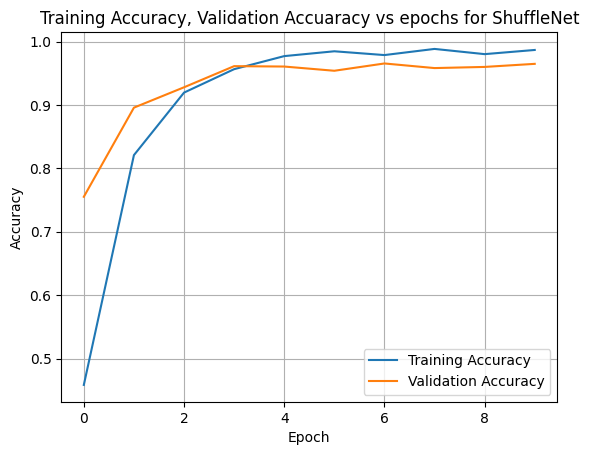

In [13]:
training_accuracy_tensor = torch.tensor(training_accuracy)
validation_accuracy_tensor = torch.tensor(validation_accuracy)

plt.plot(training_accuracy_tensor.to('cpu'), label='Training Accuracy')
plt.plot(validation_accuracy_tensor.to('cpu'), label='Validation Accuracy')
plt.title('Training Accuracy, Validation Accuaracy vs epochs for ShuffleNet')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

Test Accuracy: 0.9696969696969697
[[306   0   0   0   0   0   0   0   3   0   8]
 [  1 298   2   1   0   0   1   0   0   0   2]
 [  1   1 291   2   2   0  11   4   0   0   2]
 [  0   0   0 290   0   1   2   1   0   1   1]
 [  0   0   0   0 296   3   1   0   5   1   0]
 [  0   0   0   0   2 290   0   0   0   0   0]
 [  0   0   0   0   5   0 286   0   0   0   0]
 [  0   3   2   0   3   0   2 281   0   0   0]
 [  0   0   0   0   0   0   0   0 314   0   1]
 [  0   0   0   0   0   1   0   0   3 288   2]
 [ 10   1   0   1   1   3   2   0   1   0 260]]


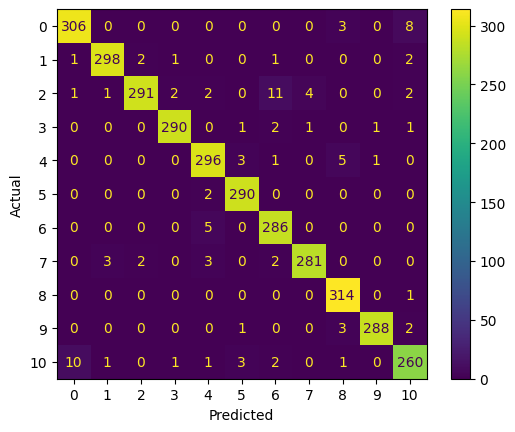

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       317
           1       0.98      0.98      0.98       305
           2       0.99      0.93      0.96       314
           3       0.99      0.98      0.98       296
           4       0.96      0.97      0.96       306
           5       0.97      0.99      0.98       292
           6       0.94      0.98      0.96       291
           7       0.98      0.97      0.97       291
           8       0.96      1.00      0.98       315
           9       0.99      0.98      0.99       294
          10       0.94      0.93      0.94       279

    accuracy                           0.97      3300
   macro avg       0.97      0.97      0.97      3300
weighted avg       0.97      0.97      0.97      3300



In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

models.eval()
with torch.no_grad():
    test_preds = []
    test_labels = []
    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = models(inputs)
        _, preds = torch.max(outputs, 1)
        test_preds.extend(preds.tolist())
        test_labels.extend(labels.tolist())

test_acc = accuracy_score(test_labels, test_preds)
print('Test Accuracy: {}'.format(test_acc))

#target_names = list(data_loader_train.class_to_idx.keys())
cm = confusion_matrix(test_labels, test_preds)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
#sns.heatmap(cm, annot=True, cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(test_labels, test_preds))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3300 samples in 0.055s...
[t-SNE] Computed neighbors for 3300 samples in 16.160s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3300
[t-SNE] Computed conditional probabilities for sample 2000 / 3300
[t-SNE] Computed conditional probabilities for sample 3000 / 3300
[t-SNE] Computed conditional probabilities for sample 3300 / 3300
[t-SNE] Mean sigma: 50.341628
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.275589
[t-SNE] KL divergence after 2000 iterations: 0.735170


<ipython-input-15-56d6b030b23e>:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(target_names)-1)
<ipython-input-15-56d6b030b23e>:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(tsne_features[indices, 0], tsne_features[indices, 1], label=target_name, c=cmap(i))


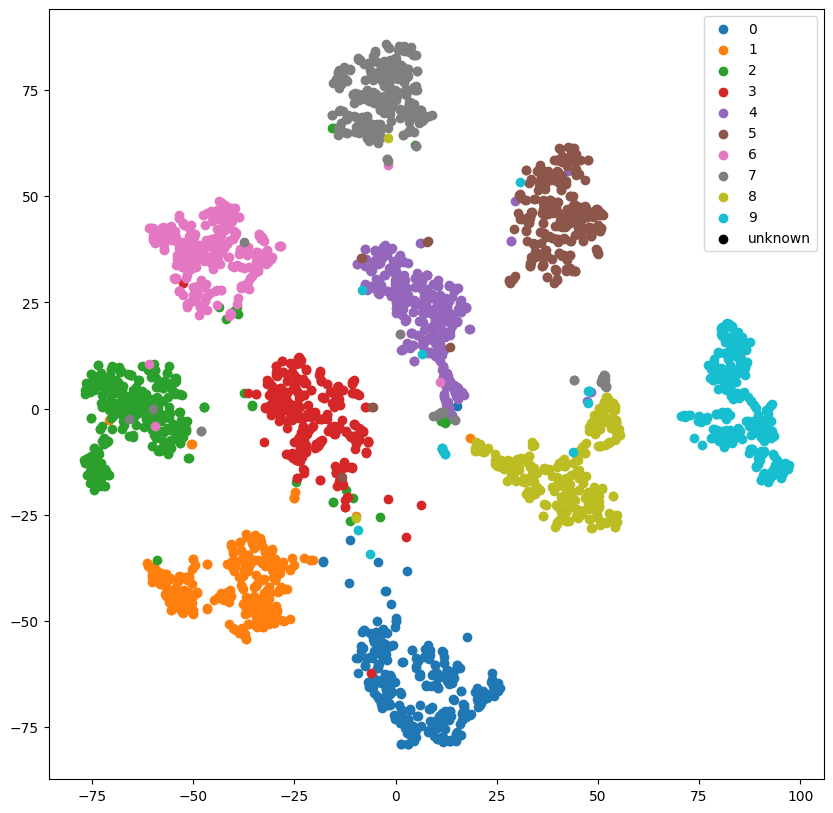

In [15]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

models.to('cuda')

models = torch.nn.Sequential(*(list(models.children())[:-1]))

models.eval()

features = []
labels = []
for images, target in test_dataloader:
    images = images.to('cuda')
    with torch.no_grad():
        output = models(images)
        features.append(output.squeeze().cpu().numpy())
        labels.append(target.cpu().numpy())

features = np.concatenate(features, axis=0)
labels = np.concatenate(labels, axis=0)

# reshape the features array to have two dimensions
n_samples = features.shape[0]
n_features = np.prod(features.shape[1:])
features = features.reshape((n_samples, n_features))

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=2000)
tsne_features = tsne.fit_transform(features)

target_names = list(dataset.class_to_idx.keys())

cmap = plt.cm.get_cmap('tab10', len(target_names)-1)

u = False

plt.figure(figsize=(10, 10))
for i, target_name in enumerate(target_names):
    if target_name != "unknown":
        indices = labels == i
        plt.scatter(tsne_features[indices, 0], tsne_features[indices, 1], label=target_name, c=cmap(i))
plt.scatter(tsne_features[u, 0], tsne_features[u, 1], label="unknown", c="k")
plt.legend()
plt.show()


In [16]:
import torch
import torchvision

model_mobile = torchvision.models.mobilenet_v3_small(pretrained=False)
#models = [torchvision.models.resnet18(pretrained=False)]
model_mobile.fc = nn.Linear(model_mobile.classifier[0].in_features, 11)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [17]:
import time
training_loss = []
validation_loss = []
training_accuracy = []
validation_accuracy = []
model_mobile.to(device)
start_time=time.time()
for epoch in range(num_epochs):
    running_training_loss = 0.0
    running_training_accuracy = 0.0
    models.train()
    for i, (inputs, labels) in enumerate(train_dataloader):
        optimizers.zero_grad()
        inputs = inputs.to(device)  
        labels = labels.to(device) 
        outputs = model_mobile(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizers.step()
        running_training_loss += loss.item()
        if (i+1) % 50 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_dataloader)}], Loss: {loss.item()}')
        _, preds = torch.max(outputs, 1)
        running_training_accuracy += torch.sum(preds == labels.data)
    
    epoch_training_loss = running_training_loss / len(train_dataloader)
    epoch_training_accuracy = running_training_accuracy / len(train_dataloader.dataset)
    training_loss.append(epoch_training_loss)
    training_accuracy.append(epoch_training_accuracy)
    
    running_validation_loss = 0.0
    running_validation_accuracy = 0.0
    model_mobile.eval()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(validation_dataloader):
            inputs = inputs.to(device)  
            labels = labels.to(device)
            outputs = models(inputs)
            loss = criterion(outputs, labels)
            running_validation_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            running_validation_accuracy += torch.sum(preds == labels.data)
    
    epoch_validation_loss = running_validation_loss / len(train_dataloader)
    epoch_validation_accuracy = running_validation_accuracy / len(validation_dataloader.dataset)
    validation_loss.append(epoch_validation_loss)
    validation_accuracy.append(epoch_validation_accuracy)
    print('Epoch [{}/{}], Training Loss: {}, Training Accuracy: {}, Validation Loss: {}, Validation Accuracy: {}'
          .format(epoch+1, num_epochs, epoch_training_loss, epoch_training_accuracy, epoch_validation_loss, epoch_validation_accuracy))
print("#########Time Taken{}#########".format(time.time()-start_time))

Epoch [1/10], Step [50/181], Loss: 6.907107353210449
Epoch [1/10], Step [100/181], Loss: 6.9109368324279785
Epoch [1/10], Step [150/181], Loss: 6.910610675811768


RuntimeError: ignored

In [ ]:
training_accuracy_tensor = torch.tensor(training_accuracy)
validation_accuracy_tensor = torch.tensor(validation_accuracy)

plt.plot(training_accuracy_tensor.to('cpu'), label='Training Accuracy')
plt.plot(validation_accuracy_tensor.to('cpu'), label='Validation Accuracy')
plt.title('Training Accuracy, Validation Accuaracy vs epochs for MobileNet')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

model_mobile.eval()
with torch.no_grad():
    test_preds = []
    test_labels = []
    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model_mobile(inputs)
        _, preds = torch.max(outputs, 1)
        test_preds.extend(preds.tolist())
        test_labels.extend(labels.tolist())

test_acc = accuracy_score(test_labels, test_preds)
print('Test Accuracy: {}'.format(test_acc))

#target_names = list(data_loader_train.class_to_idx.keys())
cm = confusion_matrix(test_labels, test_preds)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
#sns.heatmap(cm, annot=True, cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(test_labels, test_preds))

In [ ]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

model_mobile.to('cuda')

model_mobile = torch.nn.Sequential(*(list(models.children())[:-1]))

model_mobile.eval()

features = []
labels = []
for images, target in test_dataloader:
    images = images.to('cuda')
    with torch.no_grad():
        output = model_mobile(images)
        features.append(output.squeeze().cpu().numpy())
        labels.append(target.cpu().numpy())

features = np.concatenate(features, axis=0)
labels = np.concatenate(labels, axis=0)

# reshape the features array to have two dimensions
n_samples = features.shape[0]
n_features = np.prod(features.shape[1:])
features = features.reshape((n_samples, n_features))

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=2000)
tsne_features = tsne.fit_transform(features)

target_names = list(dataset.class_to_idx.keys())

cmap = plt.cm.get_cmap('tab10', len(target_names)-1)

u = False

plt.figure(figsize=(10, 10))
for i, target_name in enumerate(target_names):
    if target_name != "unknown":
        indices = labels == i
        plt.scatter(tsne_features[indices, 0], tsne_features[indices, 1], label=target_name, c=cmap(i))
plt.scatter(tsne_features[u, 0], tsne_features[u, 1], label="unknown", c="k")
plt.legend()
plt.show()


In [ ]:
import torch
import torchvision

model_resnet = torchvision.models.resnet18(pretrained=False)

model_resnet.fc == nn.Linear(models.fc.in_features,11)

In [ ]:
import time
training_loss = []
validation_loss = []
training_accuracy = []
validation_accuracy = []
model_resnet.to(device)
start_time=time.time()
for epoch in range(num_epochs):
    running_training_loss = 0.0
    running_training_accuracy = 0.0
    model_resnet.train()
    for i, (inputs, labels) in enumerate(train_dataloader):
        optimizers.zero_grad()
        inputs = inputs.to(device)  
        labels = labels.to(device) 
        outputs = models(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizers.step()
        running_training_loss += loss.item()
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1  }/{len(train_dataloader)}], Loss: {loss.item()}')
        _, preds = torch.max(outputs, 1)
        running_training_accuracy += torch.sum(preds == labels.data)
    
    epoch_training_loss = running_training_loss / len(train_dataloader)
    epoch_training_accuracy = running_training_accuracy / len(train_dataloader.dataset)
    training_loss.append(epoch_training_loss)
    training_accuracy.append(epoch_training_accuracy)
    
    running_validation_loss = 0.0
    running_validation_accuracy = 0.0
    models.eval()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(validation_dataloader):
            inputs = inputs.to(device)  
            labels = labels.to(device)
            outputs = model_resnet(inputs)
            loss = criterion(outputs, labels)
            running_validation_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            running_validation_accuracy += torch.sum(preds == labels.data)
    
    epoch_validation_loss = running_validation_loss / len(train_dataloader)
    epoch_validation_accuracy = running_validation_accuracy / len(validation_dataloader.dataset)
    validation_loss.append(epoch_validation_loss)
    validation_accuracy.append(epoch_validation_accuracy)
    print('Epoch [{}/{}], Training Loss: {}, Training Accuracy: {}, Validation Loss: {}, Validation Accuracy: {}'
          .format(epoch+1, num_epochs, epoch_training_loss, epoch_training_accuracy, epoch_validation_loss, epoch_validation_accuracy))
print("#########Time Taken{}#########".format(time.time()-start_time))

In [ ]:
training_accuracy_tensor = torch.tensor(training_accuracy)
validation_accuracy_tensor = torch.tensor(validation_accuracy)

plt.plot(training_accuracy_tensor.to('cpu'), label='Training Accuracy')
plt.plot(validation_accuracy_tensor.to('cpu'), label='Validation Accuracy')
plt.title('Training Accuracy, Validation Accuaracy vs epochs for ShuffleNet')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

model_resnet.eval()
with torch.no_grad():
    test_preds = []
    test_labels = []
    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model_resnet(inputs)
        _, preds = torch.max(outputs, 1)
        test_preds.extend(preds.tolist())
        test_labels.extend(labels.tolist())

test_acc = accuracy_score(test_labels, test_preds)
print('Test Accuracy: {}'.format(test_acc))

#target_names = list(data_loader_train.class_to_idx.keys())
cm = confusion_matrix(test_labels, test_preds)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,cmap='Orange')
disp.plot()
#sns.heatmap(cm, annot=True, cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(test_labels, test_preds))

In [ ]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

model_resnet.to('cuda')

model_resnet = torch.nn.Sequential(*(list(models.children())[:-1]))

model_resnet.eval()

features = []
labels = []
for images, target in test_dataloader:
    images = images.to('cuda')
    with torch.no_grad():
        output = models(images)
        features.append(output.squeeze().cpu().numpy())
        labels.append(target.cpu().numpy())

features = np.concatenate(features, axis=0)
labels = np.concatenate(labels, axis=0)

# reshape the features array to have two dimensions
n_samples = features.shape[0]
n_features = np.prod(features.shape[1:])
features = features.reshape((n_samples, n_features))

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=2000)
tsne_features = tsne.fit_transform(features)

target_names = list(dataset.class_to_idx.keys())

cmap = plt.cm.get_cmap('tab10', len(target_names)-1)

u = False

plt.figure(figsize=(10, 10))
for i, target_name in enumerate(target_names):
    if target_name != "unknown":
        indices = labels == i
        plt.scatter(tsne_features[indices, 0], tsne_features[indices, 1], label=target_name, c=cmap(i))
plt.scatter(tsne_features[u, 0], tsne_features[u, 1], label="unknown", c="k")
plt.legend()
plt.show()
